In [7]:
'''
    This function will be used for
    -   taking a dataset in
    -   temporary removal of all targets
    -   and analyzing orthogonality with PCA decomposition
'''
#imports
import pandas as pd
import numpy as np

#read in data - NOTE changeable name
data = pd.read_csv('betaset_tmp.csv')

#remove all targets - NOTE current solution, may change
data = data.drop(columns=[f't_{i}' for i in range(1,61)])

In [8]:
#introduce PCA

from sklearn.decomposition import PCA
pca = PCA()

#normalize before PCA utilization

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()

#fit scaler
X_normalized = scaler.fit_transform(data)
#fit pca
X = pca.fit_transform(X_normalized)

#print(pca.get_covariance()) #optional printout, buggy in jn

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[3.45367273e-01 2.28682211e-01 1.46164766e-01 6.64440611e-02
 5.14855796e-02 2.62099927e-02 1.93699786e-02 1.24874972e-02
 9.91084550e-03 8.01739742e-03 6.54064123e-03 5.82453711e-03
 4.04967984e-03 3.47316299e-03 2.79654566e-03 2.27974074e-03
 2.10799358e-03 2.00811430e-03 1.63607262e-03 1.53442623e-03
 1.43143771e-03 1.37522675e-03 1.23685473e-03 1.21244306e-03
 1.09388978e-03 1.09159923e-03 9.78362646e-04 9.22264678e-04
 9.13816745e-04 8.73732434e-04 8.36408203e-04 8.15994575e-04
 8.07331370e-04 7.90897943e-04 7.71273869e-04 7.49720282e-04
 7.28621566e-04 7.22117740e-04 7.07949100e-04 6.98725931e-04
 6.89980843e-04 6.84811565e-04 6.80533984e-04 6.72759583e-04
 6.67425537e-04 6.62754957e-04 6.56782213e-04 6.52877290e-04
 6.50395099e-04 6.45985136e-04 6.44661440e-04 6.41329254e-04
 6.39941304e-04 6.37466347e-04 6.31125179e-04 6.26569075e-04
 6.25164015e-04 6.21731456e-04 6.19556206e-04 6.15237293e-04
 6.14440226e-04 6.12658499e-04 6.09948120e-04 6.07804365e-04
 6.07086991e-04 6.054411

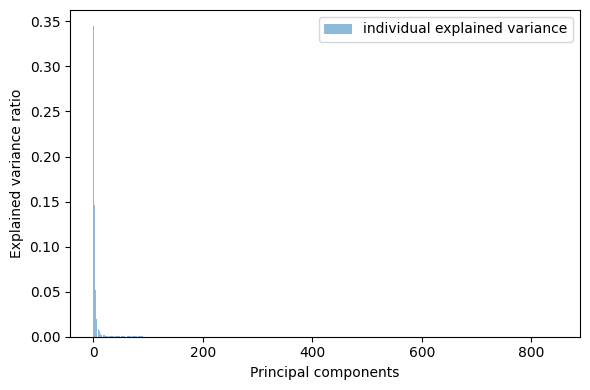

In [9]:
import matplotlib.pyplot as plt

#plot current info collection

plt.figure(figsize=(6, 4))

plt.bar(range(X.shape[1]), explained_variance, alpha=0.5, align='center',
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

Working with 847 features



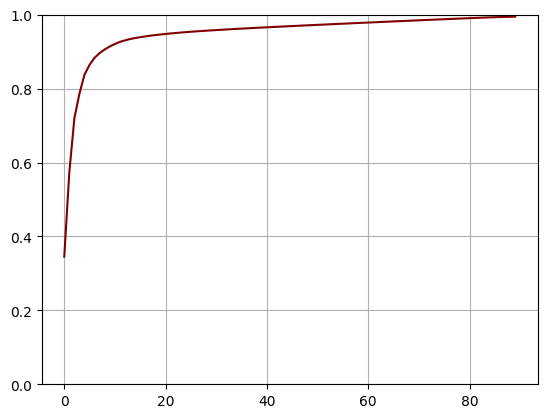

In [10]:
X_normalized = StandardScaler().fit_transform(data)

print(f'Working with {X_normalized.shape[1]} features\n')

dimensionality = 90

data_loss = []
for i in range(dimensionality):
    pca = PCA(n_components = i+1)
    pca.fit(X_normalized)
    X_new = pca.transform(X_normalized)
    retained_variance = np.sum(pca.explained_variance_ratio_)
    data_loss.append(retained_variance)

plt.plot(range(dimensionality), data_loss, color='maroon')
plt.grid()
plt.ylim(0,1)
plt.show()

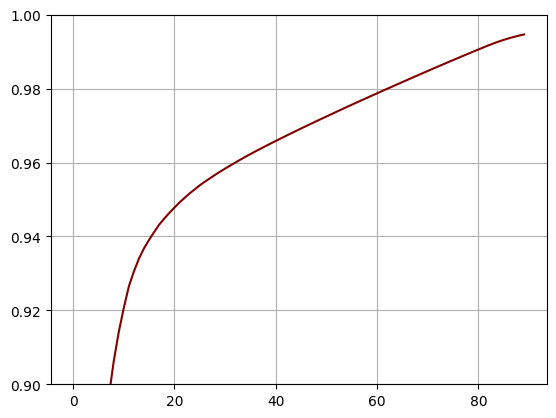

: 

In [ ]:
plt.plot(range(dimensionality), data_loss, color='maroon')
plt.grid()
plt.ylim(0.9,1)
plt.show()